# Editor di immagini

Per questo esercizio dovrai creare un semplice editor di immagini, andando a scegliere i moduli da utilizzare dal Python Package Index e studiando la loro documentazione. Per la ricerca non ti basare solo su PyPi, Google, StackOverflow e Github sono anche tuoi amici.

Il programma dovrà chiedere all'utente il percorso ad un'immagine jpg o png, prima di andare avanti il programma deve assicurarsi che l'immagine effettivamente esista (suggerimento, dai uno sguardo al modulo path di os) e che abbia una delle due estensioni accettate, altrimenti deve mostrare un avviso ed uscire.

In seguito, dovrà stampare su schermo:

1. Nome dell'immagine (solo il nome senza il percorso).
2. Estensione dell'immagine (jpg o png).
3. Risoluzione dell'immagine (larghezza x altezza).

Fatto ciò, il programma deve chiedere all'utente se vuole cambiare la risoluzione dell'immagine, l'utente dovrà inserire una risoluzione in formato LARGHEZZAxALTEZZA oppure lasciare vuoto, se lascia vuoto la risoluzione non verrà modificata.

Se le proporzioni della nuova risoluzione sono differenti da quelle originali, allora il programma dovrà chiedere all'utente se vuole mantenerle, in caso positivo bisogna modificare larghezza/altezza inserita dall'utente per mantenere le proporzioni originali.

In seguito il programma dovrà chiedere all'utente se vuole convertire l'immagine in bianco e nero, in caso positivo, dovrà farlo.

Il programma dovrà salvare la nuova immagine nella stessa directory dove si trova l'immagine originale, con il nome NOME_IMMAGINE_ORIGINALE_new.ESTENSIONE.

Infine, il programma dovrà mostrare la nuova immagine su schermo.

Di seguito un esempio di utilizzo del programma.

In [ ]:
#Inserisci il percorso all'immagine: pictures/cat.png

# File: cat.png
# Formato: png
# Risoluzione: 512x512
# Nuova risoluzione: 50x75
# Mantenere le proporzioni? [si/no]: si
# Nuova risoluzione 50x50
# Convertire in bianco e nero? [si/no]: si
# Nuova immagine salvata in pictures//cat_new.png

**BONUS**

Se usi Jupyter Notebook/Google Colab, prova a mostrare l'immagine finale dentro il tuo notebook.

In [ ]:
pip install Pillow==8.4.0

In [4]:
from PIL import Image 
from os.path import isfile
from sys import exit

def is_valid_img(img_path, accepted_ext=[".jpg",".png"]):

    for ext in accepted_ext:
        if ext in img_path:
            return True
    
    return False
    

def keep_aspect_ratio(size, original_ratio):
    ratio = size[0]/size[1]
    if original_ratio > ratio:
        size[0]=int(size[1]/original_ratio)
    else:
        size[1] = int(size[0]*original_ratio)
    
    return size
    
img_path = input("Inserisci il percorso all'immagine: ")

assert(isfile(img_path)), f"{img_path} non esiste!"
assert(is_valid_img(img_path)), f"{img_path} non è un'immagine valida!"

img_name = img_path.split("/")[-1]
img_folder = img_path.replace(img_name,"")
img_ext = img_path.split(".")[-1]

img = Image.open(img_path)

print("\n")
print(f"File: {img_name}")
print(f"Formato: {img_ext}")
print(f"Risoluzione: {img.width}x{img.height}")
print("\n")

new_size = input("Nuova risoluzione [WxH]: ")

if new_size!="":
    new_width, new_height = list(map(int, new_size.split("x")))
    original_ratio = img.width/img.height
    
    if original_ratio!=new_width/new_height:
        keep_ratio = input("Mantenere le proporzioni? [si/no default=no]: ")
        if keep_ratio == "si":
            new_width, new_height = keep_aspect_ratio([new_width, new_height], original_ratio)
            print(f"Nuova risoluzione {new_width}x{new_height}")
            
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    
bw_mode = input("Convertire in bianco e nero? [si/no default=no]: ")

if bw_mode=="si":    
    img = img.convert('1')

new_img_path = img_folder+"/"+img_name.split(".")[0]+"_new."+img_ext
img.save(new_img_path)
print(f"\nNuova immagine salvata in {new_img_path}")


Inserisci il percorso all'immagine: photo/mia.jpg


File: mia.jpg
Formato: jpg
Risoluzione: 720x1280


Nuova risoluzione: 
Convertire in bianco e nero? [si/no default=no]: si

Nuova immagine salvata in photo//mia_new.jpg


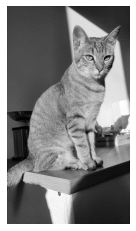

In [5]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(img)
plt.show()